In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"using PyTorch version: {torch.__version__}, Device: {DEVICE}")

using PyTorch version: 2.3.0+cu121, Device: cuda


In [3]:
fashion_mnist_transform = transforms.Compose([transforms.ToTensor(),
                                              transforms.Normalize(mean=(0.5), std=(0.5))])

In [4]:
train_dataset = datasets.FashionMNIST(root='./FASHION10_data/',
                                  train = True,
                                  download = True,
                                  transform = fashion_mnist_transform)
test_dataset = datasets.FashionMNIST(root ='./FASHION10_data/',
                                 train = False,
                                 download = True,
                                 transform = fashion_mnist_transform)

print(len(train_dataset), type(train_dataset))
print(len(test_dataset), type(test_dataset))

60000 <class 'torchvision.datasets.mnist.FashionMNIST'>
10000 <class 'torchvision.datasets.mnist.FashionMNIST'>


In [5]:
print(len(train_dataset))

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(train_dataset, [train_dataset_size, validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

60000
51000 9000 10000


In [6]:
train_loader = DataLoader(train_dataset,
                          batch_size = 32,
                          shuffle = True,
                          num_workers = 2)
validation_loader = DataLoader(validation_dataset,
                               batch_size=32,
                               shuffle =True,
                               num_workers = 2)
test_loader = DataLoader(test_dataset,
                         batch_size = 32,
                         shuffle = False,
                         num_workers = 2)

In [20]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
   

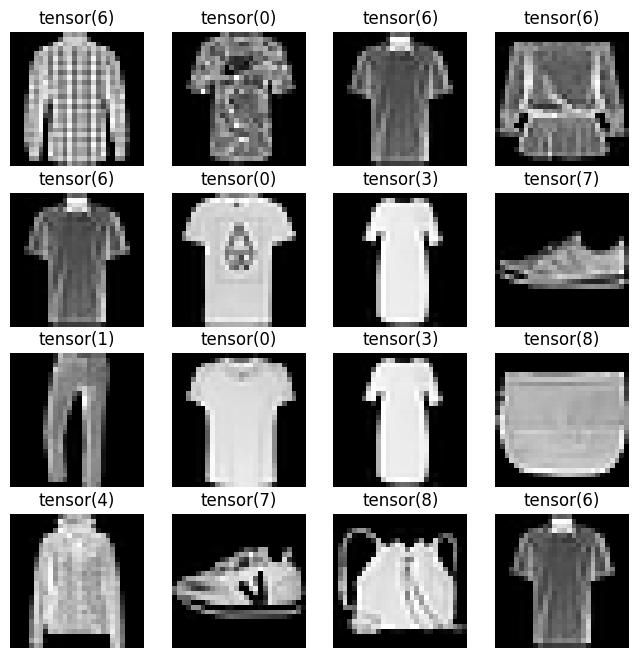

In [8]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(8, 8))
random_idx = np.random.randint(0, images.shape[0], size=16)
for i, idx in enumerate(random_idx) :
    img = images[idx].squeeze()
    label = labels[idx]
    plt.subplot(4, 4, i+1)
    plt.imshow(img, 'gray')
    plt.title(label)
    plt.axis('off')
plt.show()

torch.Size([32, 1, 28, 28]) torch.Size([32])


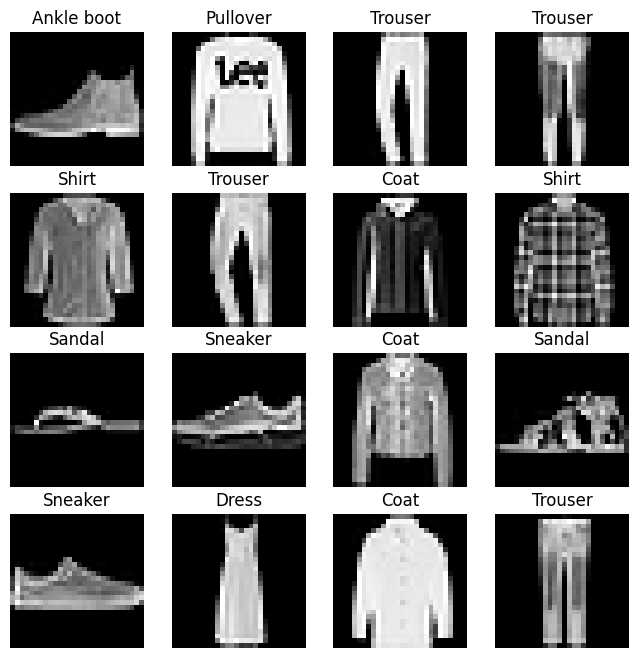

In [9]:
images, labels = next(iter(test_loader))
print(images.shape, labels.shape)

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(0, rows*cols) :
  img = images[i].squeeze()
  label_idx = labels[i].item()
  label = label_map[label_idx]
  plt.subplot(4, 4, i+1)
  plt.imshow(img, 'gray')
  plt.title(label)
  plt.axis('off')
plt.show()

In [10]:
class MyCNNModel(nn.Module):

    def __init__(self):

        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

        self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(1 * 1 * 256, 128)
        self.fc2 = nn.Linear(128, 10)

        self.dropout25 = nn.Dropout(p=0.25)
        self.dropout50 = nn.Dropout(p=0.5)

    def forward(self, data):

        data = self.conv1(data)
        data = torch.relu(data)
        data = self.conv2(data)
        data = torch.relu(data)
        # data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv3(data)
        data = torch.relu(data)
        data = self.conv4(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv5(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv6(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv7(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = data.view(-1, 1 * 1 * 256)

        data = self.fc1(data)
        data = torch.relu(data)
        data = self.dropout50(data)

        logits = self.fc2(data)

        return logits
    
model = MyCNNModel()
print(model)

MyCNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout25): Dropout(p=0.25, inplace=False)
  (dropout50): Dropout(p=0.5, inplace=False)
)


In [11]:
model = MyCNNModel().to(DEVICE)

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [12]:
# params = list(model.parameters())
# print(len(params))
# print(params[0].size())

In [13]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:

        x_train = images.to(DEVICE)
        y_train = labels.to(DEVICE)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += ((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100*train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [14]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100*val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [15]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum = 0
        test_correct=0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:

            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)
     

In [16]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()
EPOCHS = 100

for epoch in range(EPOCHS):

    #==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(train_loader, model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #=============================================

    #============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(validation_loader, model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    #============  model evaluation  ==============

    print('epoch:', '%02d' % (epoch + 1),
          'train loss =', '{:.3f}'.format(train_avg_loss), 'train acc =', '{:.3f}'.format(train_avg_accuracy),
          'val loss =', '{:.3f}'.format(val_avg_loss), 'val acc =', '{:.3f}'.format(val_avg_accuracy))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

epoch: 01 train loss = 0.691 train acc = 74.271 val loss = 0.340 val acc = 86.778
epoch: 02 train loss = 0.399 train acc = 85.965 val loss = 0.295 val acc = 89.211
epoch: 03 train loss = 0.350 train acc = 87.761 val loss = 0.272 val acc = 90.011
epoch: 04 train loss = 0.321 train acc = 88.808 val loss = 0.252 val acc = 90.311
epoch: 05 train loss = 0.300 train acc = 89.451 val loss = 0.247 val acc = 90.711
epoch: 06 train loss = 0.292 train acc = 89.727 val loss = 0.235 val acc = 91.133
epoch: 07 train loss = 0.290 train acc = 89.890 val loss = 0.237 val acc = 91.500
epoch: 08 train loss = 0.272 train acc = 90.384 val loss = 0.240 val acc = 91.178
epoch: 09 train loss = 0.268 train acc = 90.484 val loss = 0.221 val acc = 91.700
epoch: 10 train loss = 0.263 train acc = 90.655 val loss = 0.222 val acc = 91.556
epoch: 11 train loss = 0.255 train acc = 90.898 val loss = 0.218 val acc = 92.200
epoch: 12 train loss = 0.254 train acc = 91.067 val loss = 0.224 val acc = 91.622
epoch: 13 train 

In [17]:
# test dataset 으로 정확도 및 오차 테스트

model_test(test_loader, model)

accuracy: 92.65
loss: 0.2195091714886145


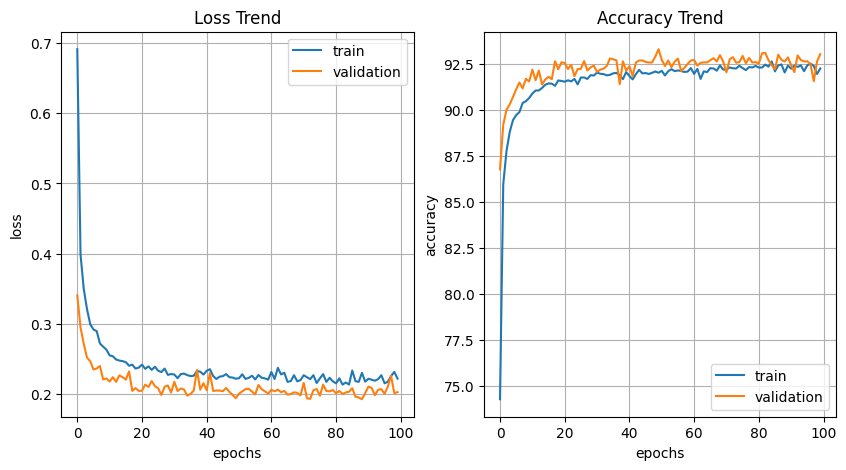

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()

In [24]:
images, labels = next(iter(test_loader))
print(images.shape, labels.shape)

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(0, rows*cols) :
  img = images[i].squeeze()
  label_idx = labels[i].item()
  label = label_map[label_idx]
  output = model(images[idx])
  print(output)
  plt.subplot(4, 4, i+1)
  plt.imshow(img, 'gray')
  plt.title(label)
  plt.axis('off')
plt.show()

torch.Size([32, 1, 28, 28]) torch.Size([32])


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

<Figure size 800x800 with 0 Axes>

In [21]:
import torch.nn.functional as F


images, labels = next(iter(test_loader))

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}


plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, 32, size=16)

for i, idx in enumerate(random_idx):
    img = images[idx].numpy().squeeze()
    label = labels[idx].item()
    output = model(images[idx].unsqueeze(0))  # 이미지를 모델에 전달하여 예측 결과를 얻습니다.
    probabilities = F.softmax(output, dim=1)  # 소프트맥스 함수를 적용하여 확률값으로 변환합니다.
    prediction = torch.argmax(output, dim=1).item()
    predicted_label = label_map[prediction]
    correct_probability = probabilities[0, label].item() * 100  # 정답을 맞춘 확률을 가져옵니다.
    plt.subplot(4, 4, i+1)
    plt.imshow(img, 'gray')
    plt.title(f'{predicted_label}, {correct_probability:.2f}%')
    plt.axis('off')

plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

<Figure size 800x800 with 0 Axes>

In [ ]:
correct = 0
total = 0

with torch.no_grad() :
  for data in test_loader :
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted ==labels).sum().item()

print(100*correct/ total)

82.74
